In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

import os
import glob

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
dataset = pd.read_csv(r'/content/drive/MyDrive/NBaIotDS/BinaryDS/BinaryDataset.csv', index_col=0)

In [ ]:
dataset.head()

In [ ]:
X, y = dataset.iloc[:, :-1], dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle=True)


In [ ]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)

In [ ]:
cm_DT = confusion_matrix(y_test, y_pred)
cf_matrix_DT = confusion_matrix(y_test, y_pred)

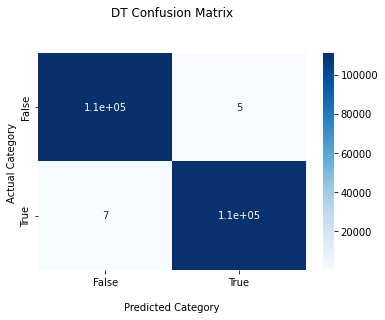

In [ ]:
# Decision tree plot
ax = sns.heatmap(cf_matrix_DT, annot=True, cmap='Blues')

ax.set_title('DT Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
DT_Accuracy = accuracy_score(y_test, y_pred)

In [ ]:
TN = cf_matrix_DT[0,0 ]
FP = cf_matrix_DT[0,1 ]
FN = cf_matrix_DT[1,0 ]
TP = cf_matrix_DT[1,1 ]
Specificity = TN/(TN+FP)
print('Decision Tree Performance Evaluation Results:')
DT_Precision = precision_score(y_test, y_pred)
DT_F1 = f1_score (y_test, y_pred)
DT_Recall = recall_score(y_test, y_pred)
print('(DT_Accuracy, DT_Precision,  DT_Recall, DT_F1, DT_Specificity)')
round(DT_Accuracy,6), round(DT_Precision,6),  round(DT_Recall,6), round(DT_F1,6), round(Specificity,6)

Decision Tree Performance Evaluation Results:
(DT_Accuracy, DT_Precision,  DT_Recall, DT_F1, DT_Specificity)


(0.999946, 0.999955, 0.999937, 0.999946, 0.999955)

In [ ]:
TN = cf_matrix_DT[0,0 ]
FP = cf_matrix_DT[0,1 ]
FN = cf_matrix_DT[1,0 ]
TP = cf_matrix_DT[1,1 ]
DT_Specificity = TN/(TN+FP)
print('Decision Tree Performance Evaluation Results:')
DT_Precision = precision_score(y_test, y_pred)
DT_F1 = f1_score (y_test, y_pred)
DT_Recall = recall_score(y_test, y_pred)
print('(DT_Accuracy, DT_Precision,  DT_Recall, DT_F1, DT_Specificity)')
round(DT_Accuracy,6), round(DT_Precision,6),  round(DT_Recall,6), round(DT_F1,6), round(DT_Specificity,6)

Decision Tree Performance Evaluation Results:
(DT_Accuracy, DT_Precision,  DT_Recall, DT_F1, DT_Specificity)


(0.999937, 0.999946, 0.999928, 0.999937, 0.999946)

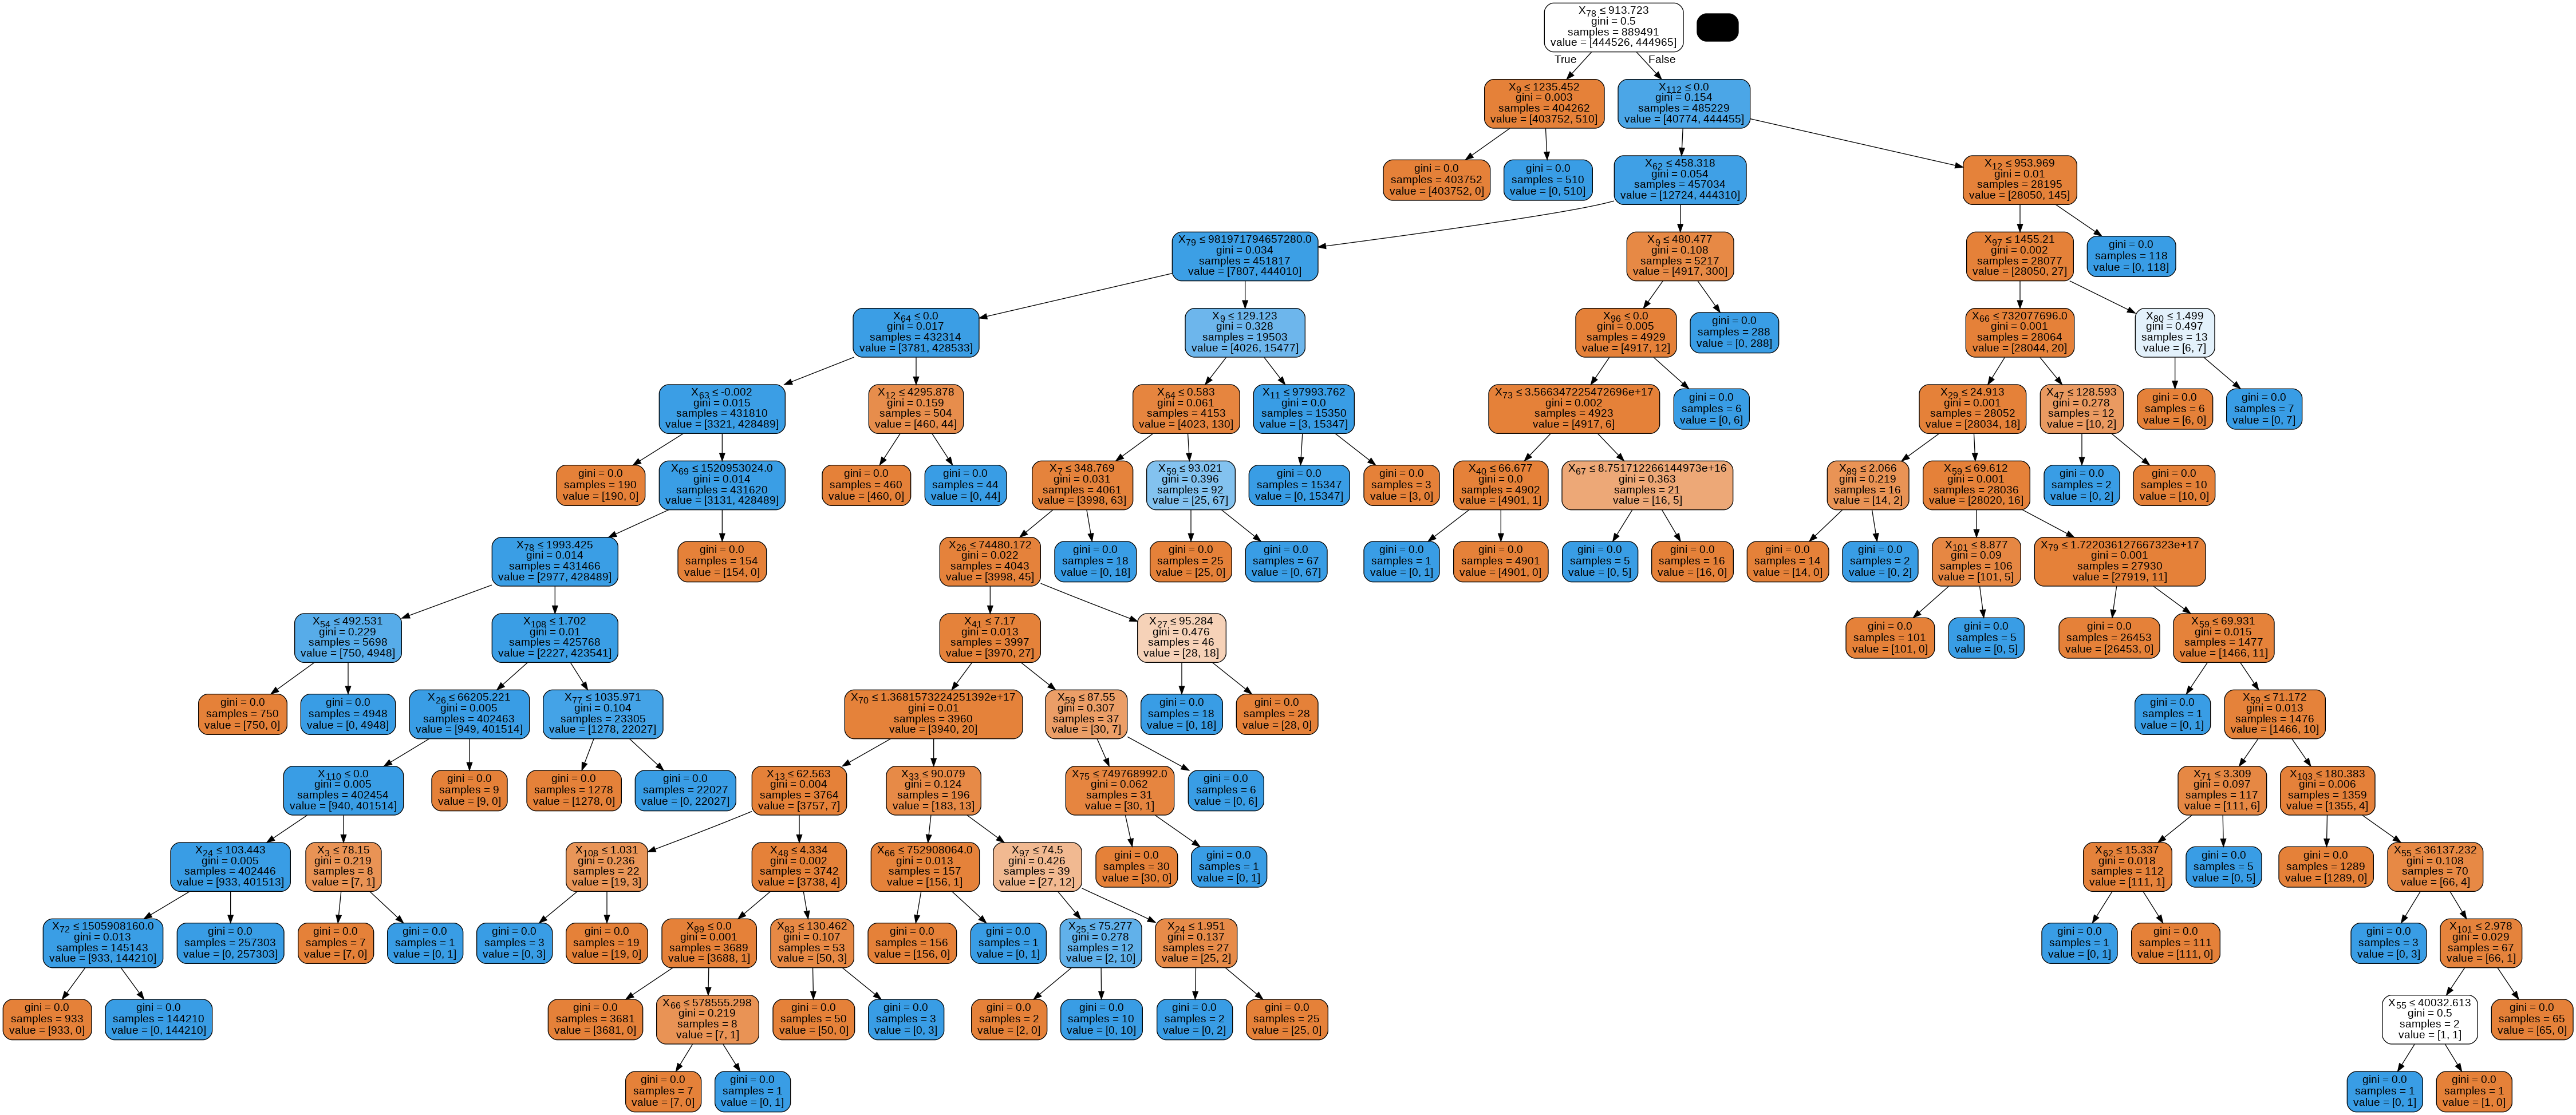

In [ ]:
from io import StringIO


from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()


export_graphviz(DT_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)

In [ ]:
cm_RF = confusion_matrix(y_test, y_pred)
cf_matrix_RF = confusion_matrix(y_test, y_pred)

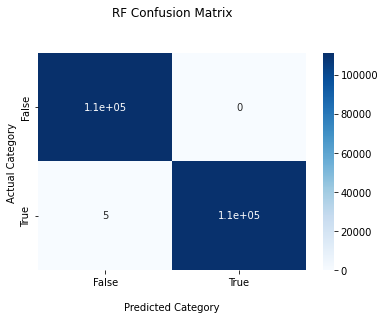

In [ ]:
# Randomforest plot
ax = sns.heatmap(cf_matrix_RF, annot=True, cmap='Blues')

ax.set_title('RF Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
RF_Accuracy = accuracy_score(y_test, y_pred)

In [ ]:
TN = cf_matrix_DT[0,0 ]
FP = cf_matrix_DT[0,1 ]
FN = cf_matrix_DT[1,0 ]
TP = cf_matrix_DT[1,1 ]
RF_Specificity = TN/(TN+FP)
print('Random Forest Performance Evaluation Results:')
RF_Precision = precision_score(y_test, y_pred)
RF_F1 = f1_score (y_test, y_pred)
RF_Recall = recall_score(y_test, y_pred)
print('(RF_Accuracy, RF_Precision,  RF_Recall, RF_F1, RF_Specificity)')
round(RF_Accuracy,6), round(RF_Precision,6),  round(RF_Recall,6), round(RF_F1,6), round(RF_Specificity,6)

Random Forest Performance Evaluation Results:
(RF_Accuracy, RF_Precision,  RF_Recall, RF_F1, RF_Specificity)


(0.999978, 1.0, 0.999955, 0.999977, 0.999937)

In [ ]:
TN = cf_matrix_DT[0,0 ]
FP = cf_matrix_DT[0,1 ]
FN = cf_matrix_DT[1,0 ]
TP = cf_matrix_DT[1,1 ]
RF_Specificity = TN/(TN+FP)
print('Random Forest Performance Evaluation Results:')
RF_Precision = precision_score(y_test, y_pred)
RF_F1 = f1_score (y_test, y_pred)
RF_Recall = recall_score(y_test, y_pred)
print('(RF_Accuracy, RF_Precision,  RF_Recall, RF_F1, RF_Specificity)')
round(RF_Accuracy,6), round(RF_Precision,6),  round(RF_Recall,6), round(RF_F1,6), round(RF_Specificity,6)

Random Forest Performance Evaluation Results:
(RF_Accuracy, RF_Precision,  RF_Recall, RF_F1, RF_Specificity)


(0.999978, 1.0, 0.999955, 0.999977, 0.999937)

In [ ]:
my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)
y_pred = my_model.predict(X_test)

In [ ]:
cm_RF = confusion_matrix(y_test, y_pred)
cf_matrix_XGB = confusion_matrix(y_test, y_pred)

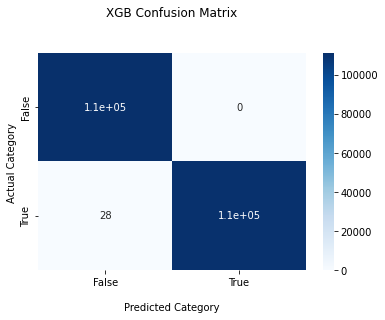

In [ ]:
# XGB plot
ax = sns.heatmap(cf_matrix_XGB, annot=True, cmap='Blues')

ax.set_title('XGB Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
XGB_Accuracy = accuracy_score(y_test, y_pred)

In [ ]:
TN = cf_matrix_DT[0,0 ]
FP = cf_matrix_DT[0,1 ]
FN = cf_matrix_DT[1,0 ]
TP = cf_matrix_DT[1,1 ]
XGB_Specificity = TN/(TN+FP)
print('XGB Performance Evaluation Results:')
XGB_Precision = precision_score(y_test, y_pred)
XGB_F1 = f1_score (y_test, y_pred)
XGB_Recall = recall_score(y_test, y_pred)
print('(XGB_Accuracy, XGB_Precision,  XGB_Recall, XGB_F1, XGB_Specificity)')
round(XGB_Accuracy,6), round(XGB_Precision,6),  round(XGB_Recall,6), round(XGB_F1,6), round(XGB_Specificity,6)

XGB Performance Evaluation Results:
(XGB_Accuracy, XGB_Precision,  XGB_Recall, XGB_F1, XGB_Specificity)


(0.999874, 1.0, 0.999748, 0.999874, 0.999937)

In [ ]:
TN = cf_matrix_DT[0,0 ]
FP = cf_matrix_DT[0,1 ]
FN = cf_matrix_DT[1,0 ]
TP = cf_matrix_DT[1,1 ]
XGB_Specificity = TN/(TN+FP)
print('XGB Performance Evaluation Results:')
XGB_Precision = precision_score(y_test, y_pred)
XGB_F1 = f1_score (y_test, y_pred)
XGB_Recall = recall_score(y_test, y_pred)
print('(XGB_Accuracy, XGB_Precision,  XGB_Recall, XGB_F1, XGB_Specificity)')
round(XGB_Accuracy,6), round(XGB_Precision,6),  round(XGB_Recall,6), round(XGB_F1,6), round(XGB_Specificity,6)

XGB Performance Evaluation Results:
(XGB_Accuracy, XGB_Precision,  XGB_Recall, XGB_F1, XGB_Specificity)


(0.999874, 1.0, 0.999748, 0.999874, 0.999937)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
my_model = AdaBoostClassifier()
my_model.fit(X_train, y_train)
y_pred = my_model.predict(X_test)

In [ ]:
cm_ADA = confusion_matrix(y_test, y_pred)
cf_matrix_ADA = confusion_matrix(y_test, y_pred)

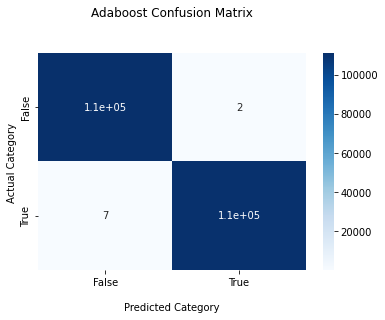

In [ ]:
# Adaboost plot
ax = sns.heatmap(cf_matrix_ADA, annot=True, cmap='Blues')

ax.set_title('Adaboost Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
ADA_Accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print('Adaboost Performance Evaluation Results:')
ADA_Precision = precision_score(y_test, y_pred)
ADA_F1 = f1_score (y_test, y_pred)
ADA_Recall = recall_score(y_test, y_pred)
print('(ADA_Accuracy, ADA_Precision, ADA_Recall, ADA_F1)')
round(ADA_Accuracy,6), round(ADA_Precision,6), round(ADA_Recall,6), round(ADA_F1,6)

Adaboost Performance Evaluation Results:
(ADA_Accuracy, ADA_Precision, ADA_Recall, ADA_F1)


(0.99996, 0.999982, 0.999937, 0.999959)

In [ ]:
from catboost import CatBoostClassifier
my_model = CatBoostClassifier()
my_model.fit(X_train, y_train)
y_pred = my_model.predict(X_test)

Learning rate set to 0.187162
0:	learn: 0.2287044	total: 519ms	remaining: 8m 38s
1:	learn: 0.0642700	total: 995ms	remaining: 8m 16s
2:	learn: 0.0204182	total: 1.45s	remaining: 8m 2s
3:	learn: 0.0094160	total: 1.96s	remaining: 8m 8s
4:	learn: 0.0050781	total: 2.35s	remaining: 7m 47s
5:	learn: 0.0028225	total: 2.73s	remaining: 7m 33s
6:	learn: 0.0020021	total: 3.12s	remaining: 7m 22s
7:	learn: 0.0015705	total: 3.49s	remaining: 7m 12s
8:	learn: 0.0012864	total: 3.83s	remaining: 7m 1s
9:	learn: 0.0011833	total: 4.23s	remaining: 6m 58s
10:	learn: 0.0011050	total: 4.63s	remaining: 6m 56s
11:	learn: 0.0010548	total: 4.98s	remaining: 6m 50s
12:	learn: 0.0010263	total: 5.35s	remaining: 6m 46s
13:	learn: 0.0009382	total: 5.73s	remaining: 6m 43s
14:	learn: 0.0008139	total: 6.07s	remaining: 6m 38s
15:	learn: 0.0007281	total: 6.43s	remaining: 6m 35s
16:	learn: 0.0006950	total: 6.82s	remaining: 6m 34s
17:	learn: 0.0006498	total: 7.16s	remaining: 6m 30s
18:	learn: 0.0006168	total: 7.49s	remaining: 6m

In [ ]:
cm_cboost = confusion_matrix(y_test, y_pred)
cf_matrix_Cboost = confusion_matrix(y_test, y_pred)

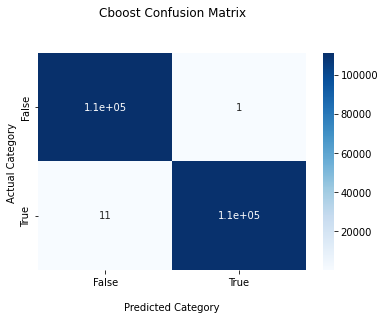

In [ ]:
# CATB plot
ax = sns.heatmap(cf_matrix_Cboost, annot=True, cmap='Blues')

ax.set_title('Cboost Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
Cboost_Accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print('Cboost Performance Evaluation Results:')
Cboost_Precision = precision_score(y_test, y_pred)
Cboost_F1 = f1_score (y_test, y_pred)
Cboost_Recall = recall_score(y_test, y_pred)
print('(Cboost_Accuracy, Cboost_Precision, Cboost_Recall, Cboost_F1)')
round(  Cboost_Accuracy,6), round(Cboost_Precision,6), round(Cboost_Recall,6), round(Cboost_F1,6)

Cboost Performance Evaluation Results:
(Cboost_Accuracy, Cboost_Precision, Cboost_Recall, Cboost_F1)


(0.999946, 0.999991, 0.999901, 0.999946)

In [ ]:
from lightgbm import LGBMClassifier
my_model = LGBMClassifier()
my_model.fit(X_train, y_train)
y_pred = my_model.predict(X_test)

In [ ]:
cm_LGB = confusion_matrix(y_test, y_pred)
cf_matrix_LGB = confusion_matrix(y_test, y_pred)

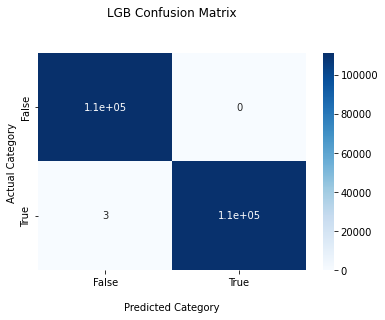

In [ ]:
# LGB plot
ax = sns.heatmap(cf_matrix_LGB, annot=True, cmap='Blues')

ax.set_title('LGB Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
LGB_Accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print('LGB Performance Evaluation Results:')
LGB_Precision = precision_score(y_test, y_pred)
LGB_F1 = f1_score (y_test, y_pred)
LGB_Recall = recall_score(y_test, y_pred)
print('(LGB_Accuracy, LGB_Precision, LGB_Recall, LGB_F1)')
round(LGB_Accuracy,6), round(LGB_Precision,6), round(LGB_Recall,6), round(LGB_F1,6)

LGB Performance Evaluation Results:
(LGB_Accuracy, LGB_Precision, LGB_Recall, LGB_F1)


(0.999987, 1.0, 0.999973, 0.999986)

In [ ]:
from sklearn.ensemble import IsolationForest
my_model = IsolationForest()
my_model.fit(X_train, y_train)
y_pred = my_model.predict(X_test)

In [ ]:
cm_IF = confusion_matrix(y_test, y_pred)
cf_matrix_IF = confusion_matrix(y_test, y_pred)

In [ ]:
# IF plot
ax = sns.heatmap(cf_matrix_IF, annot=True, cmap='Blues')

ax.set_title('IF Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
IF_Accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print('IF Performance Evaluation Results:')
IF_Precision = precision_score(y_test, y_pred)
IF_F1 = f1_score (y_test, y_pred)
IF_Recall = recall_score(y_test, y_pred)
print('(IF_Accuracy, IF_Precision, IF_Recall, IF_F1)')
round(IF_Accuracy,6), round(IF_Precision,6), round(IF_Recall,6), round(IF_F1,6)

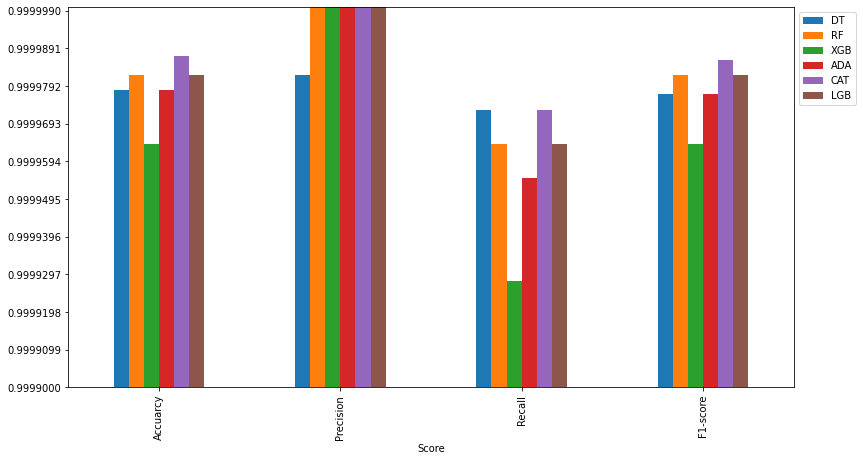

In [ ]:
from matplotlib.text import FancyBboxPatch
#labels = dataset['label'].unique().tolist()
plotdata = pd.DataFrame({
      'DT' :  [0.999978, 0.999982, 0.999973, 0.999977],
      'RF' :  [0.999982, 1.0, 0.999964, 0.999982],
      'XGB':  [0.999964, 1.0, 0.999928, 0.999964],
      'ADA':  [0.999978, 1.0, 0.999955, 0.999977],
      'CAT':  [0.999987, 1.0, 0.999973, 0.999986],
      'LGB':  [0.999982, 1.0, 0.999964, 0.999982]},
      index = ['Accuarcy', 'Precision', 'Recall', 'F1-score'])
#labels = ['Accuarcy', 'Precision', 'Recall', 'F1-score']
#x = np.arange(len(labels))
#width = 0.35
#colors= sns.color_palette('pastel')[0:5]
#plt.bar(labels, values)

plotdata.plot(kind= 'bar', figsize = (13,7))
plt.yticks(np.arange(0.9999,1,0.0000099))
plt.ylim(0.9999, 1)
plt.xlabel('Score')
plt.legend(bbox_to_anchor=(1,1), loc="best")
plt.show()